# 180816 오후수업

## Kaggle Titanic

### Kaggle titanic 데이터로 시각화하기

`conda install -c conda-forge missingno`

```python
import missingno as msno
msno.matrix(train)
```

#### 1. pivot_table과 groupby 활용해 보기

- [pandas.DataFrame.groupby — pandas 0.23.4 documentation] (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

```python
data.groupby(['col1', 'col2']).mean()
data.groupby('col1')[['col2']].mean()

data.pivot_table(index=['col1'], values=['col2'], aggfunc=np.mean)
```


#### 2. 타이타닉 데이터 시각화

https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

```python
train['Survived'] = train['Survived'].astype('category')

(ggplot(train)
 + aes(x='Sex', y='Survived')
 + geom_col() + ggtitle('성별 생존률')
 + theme(text=element_text(family='NanumBarunGothic'))
)

(ggplot(train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point() + ggtitle('생존 여부별 성별 요금 등급 분포')
 + facet_wrap('~Survived')
 + theme(text=element_text(family='NanumBarunGothic'))
)

(ggplot(train)
 + aes(x='Age')
 + geom_histogram(binwidth=10)
 + ggtitle('연령대 분포')
 + theme(text=element_text(family='NanumBarunGothic'))
)
```

#### 3. 결측치 처리

결측치 처리 후 시각화 해보기

`train['Age'] = train['Age'].dropna()` 

## Kaggle Titanic 데이터 분석 실습

In [1]:
import pandas as pd
import numpy as np
from plotnine import * 

In [2]:
train = pd.read_csv("/Users/jinyoungpark/Desktop/Projects/Titanic/train.csv")

In [8]:
test = pd.read_csv("/Users/jinyoungpark/Desktop/Projects/Titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


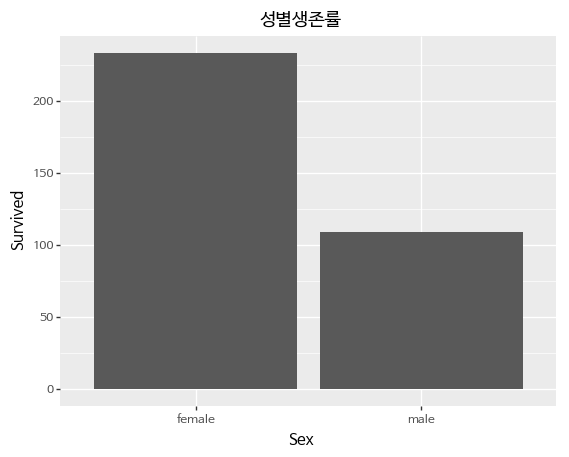

<ggplot: (7528348708)>

In [5]:
(ggplot(train)
+ aes(x='Sex', y='Survived')
+ geom_col()
+ ggtitle("성별생존률")
+ theme(text=element_text(family="NanumBarunGothic"))
)

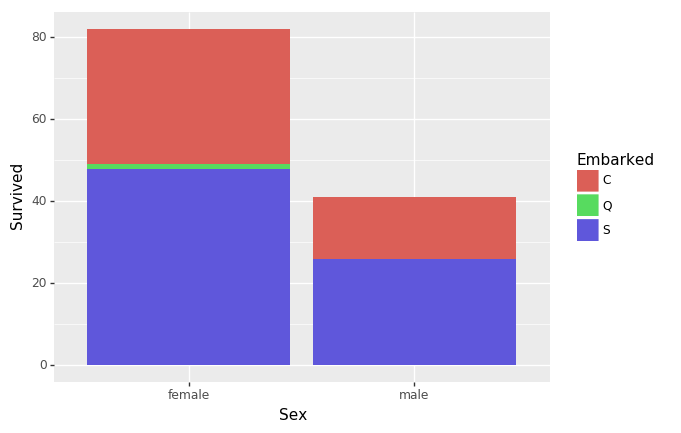

<ggplot: (-9223372036583147285)>

In [6]:
train=train.dropna() 
#Embarked에 결측치가 2개 있어서 없애줌. (아니면 에러남)

(
ggplot(train)
    + aes (x='Sex', y='Survived', fill='Embarked')
    + geom_col()
)


In [ ]:
# 각 조가 생각한 조건을 적용시키고 Kaggle에 올려본다

In [9]:
test['Survived'] = ((test['Sex'] == 'female')|(test['Age']<=9)|((test["Sex"]=='male')&(test['Pclass']!=3)))

In [10]:
submission = test[['PassengerId','Survived']].copy()

In [11]:
submission['Survived']=submission['Survived'].astype(int)

In [12]:
submission.to_csv('/Users/jinyoungpark/Desktop/Projects/Titanic/submission_fourth.csv', index=False)

In [ ]:
# 파일이 제대로 만들어졌는지 확인
# index가 있는 채로 업로드하면 Kaggle에서 패널티를 받으므로 index=False로 지정

In [13]:
pd.read_csv("/Users/jinyoungpark/Desktop/Projects/Titanic/submission_fourth.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0
